# Klinkenberg Effect Analysis

The Klinkenberg Effect, discovered by Klinkenberg in 1941, describes the phenomenon where permeability measurements differ depending on whether air or a liquid is used as the flowing fluid. Specifically, the permeability of a core sample is consistently higher when measured with air than with a liquid. This discrepancy arises because gases exhibit slippage at the sand grain surface, resulting in a higher flow rate compared to liquids, which have zero velocity at the surface. Additionally, Klinkenberg observed that as the mean pressure of the fluid increases, the calculated permeability decreases. By plotting permeability against the inverse of the mean pressure and extrapolating to where the mean pressure approaches infinity, one can estimate the liquid permeability. The magnitude of the Klinkenberg Effect varies with core permeability and the type of gas used in the measurement.

## Equations included

1) k(g) = k(l) + c(1/Pm)
kg = measured gas permeability pm = mean pressure kL = equivalent liquid permeability, i.e., absolute permeability, c = slope of the line

2) c = b.k(l) = 6.9 kL^(-0.36)

3) 6.9kL^(0.64) + pmkL - pm*kg = 0g = 0

## Procedure/Algorithm
Equation 3 can be used to calculate the absolute permeability when only one gas permeability measurement (kg) of a core sample is made at pm. This nonlinear equation can be solved iteratively by using the Newton-Raphson iterative methods. The proposed solution method can be conveniently written as

k(i+1) = k(i) - f(ki)/f'(ki)

where ki = initial guess of the absolute permeability (mD),
ki+1 = new permeability value to be used for the next iteration,
i = iteration level,
f(ki) = Equation 3,
f'(ki) = first-derivative of Equation 3

f'(ki) = 4.416 ki^(-0.36) + pm
The iterative procedure is repeated until convergence is achieved when f(ki) approaches zero or when no changes in the calculated values of ki are observed.

## Problem
The permeability of a core plug is measured by air. Only one measure
ment is made at a mean pressure of 2.152 psi. The air permeability i 
 46.6 md. Estimate the absolute permeability of the core sample. Compa 
 the result with the actual absolute permeability of 23.66 md.


In [53]:
k = input("\nEnter your first guess of absolute permeability kl: ")

k = float(k)

#f(k= kl) = 6.9kL^(0.64) + pmkL - pm*kg = 0
# f'(k) = 4.416 ki^(-0.36) + pm

pm  = input("\nEnter Mean Pr. Pm: ")
pm = float(pm)

kg = input("\nEnter K(air) = kg: ")
kg = float(kg)

while abs(6.9*(k**0.64) + pm*k - pm*kg) > 0.001:
  k = k - (6.9*(k**0.64) + pm*k - pm*kg)/(4.416*(k**(-0.36)) + pm)

print(f"The final value of Perm K is : {k}")


Enter your first guess of absolute permeability kl:  27

Enter Mean Pr. Pm:  2.152

Enter K(air) = kg:  46.6


The final value of Perm K is : 22.848995125108296


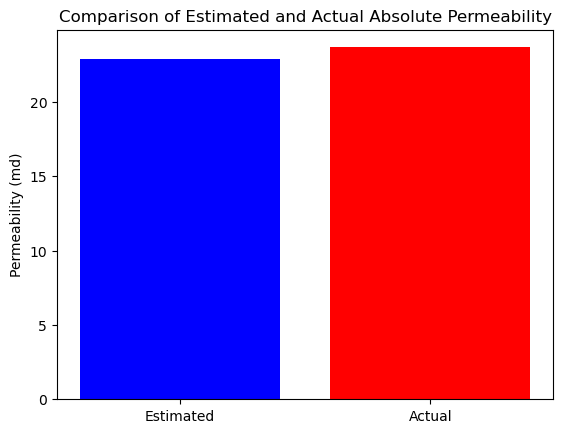

In [55]:
# Actual absolute permeability
actual_permeability = 23.66

# Plot the estimated and actual values
plt.bar(['Estimated', 'Actual'], [k, actual_permeability], color=['blue', 'red'])
plt.ylabel('Permeability (md)')
plt.title('Comparison of Estimated and Actual Absolute Permeability')
plt.show()
